# Aula 5 - Análise Descritiva

#### Descrição das análises:

Foi verficado a distribuição de 4 features importantes do dataset:

- Idade do Motorista (driver_age)
- Nível do resultado da parada (stop_outcome_level)
- Tempo da Parada (stop_duration_continuous)
- Horário da Parada (stop_time_discrete)

Nota: algumas dessas features foram criadas ou modificadas(transformadas em numéricas) para a análise.

Para auxiliar na análise, para cada uma das features foi verificado para paradas gerais e paradas que resultaram em prisão:

- Histograma
- Boxplot
- QQ Plot

definidos no método: `plot_distribution`

As conclusões estão descritas em cada uma das análises.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
csv_path = "../data/police.csv"
df = pd.read_csv(csv_path)

Aplica transformações de ETL(definidas nas últimas atividades) nos dados:

In [3]:
from etl.main import PoliceDatasetEtl

police_dataset_etl = PoliceDatasetEtl(df.copy())
featured_df = police_dataset_etl.clean_transform()

In [4]:
featured_df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,...,drugs_related_stop,stop_outcome_level,violation_level,proportional_stop_outcome,stop_time_discrete,stop_duration_continuous,is_black_or_hispanic,stop_time_discrete_bins,driver_age_bins,counter
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,...,False,3,5,0.6,1.55,7.5,False,dawn,jovem,1
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,...,False,3,5,0.6,8.15,7.5,False,morning,adulto,1
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,...,False,3,5,0.6,23.15,7.5,False,night,adulto,1
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,...,False,5,1,5.0,17.15,23.0,False,evening,jovem,1
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,...,False,3,5,0.6,10.00,7.5,False,morning,jovem,1


## Distribuições:

In [5]:
def plot_distribution(general: pd.Series, arrested: pd.Series, title: str):
    """
    plot_distribution - plots distribution of a variable

    It plots:

    * Histograms
    * Boxplots
    * QQ Plots
    ----------------------------------------------------------
    Parameters:

    general: pd.Series - general distribution
    arrested: pd.Series - arrested distribution (filtered)
    title: str - title of the plots
    """
    plt.figure(figsize=(16, 16))
    n_rows = 3
    n_cols = 2

    plt.subplot(n_rows, n_cols, 1)
    sns.histplot(general, kde=True, color="blue")
    plt.title(f"{title} Distribution - General")

    plt.subplot(n_rows, n_cols, 2)
    sns.histplot(arrested, kde=True, color="blue")
    plt.title(f"{title} Distribution - Arrested")

    plt.subplot(n_rows, n_cols, 3)
    sns.boxplot(x=general)

    plt.subplot(n_rows, n_cols, 4)
    sns.boxplot(x=arrested)

    plt.subplot(n_rows, n_cols, 5)
    stats.probplot(general, dist="norm", plot=plt)
    plt.title(f"QQ Plot - {title}")

    plt.subplot(n_rows, n_cols, 6)
    stats.probplot(arrested, dist="norm", plot=plt)
    plt.title(f"QQ Plot - {title} Arrested")

### Distribuição da Idade do Motorista (driver_age)

### Análise 📈 

**📊 Tipo de Distribuição:** Distribuição não simétrica (Gama)

**📝 Notas:**

- A distribuição é não simétrica, enviesada na faixa entre 30~40 anos.
- Após essa faixa, podemos observar no `QQ plot` que a distribuição assume características de uma distribuição normal. Chegando próximo a linha esperada.
- Podemos perceber uma pequena diferença entre a distribuição geral e a distribuição de paradas que resultaram em prisão ao analisar o `boxplot`:
  - O 75 percentil é menor que 40 anos na distribuição "arrested", enquanto na distribuição geral é maior que 40 anos.

<Figure size 1600x1600 with 0 Axes>

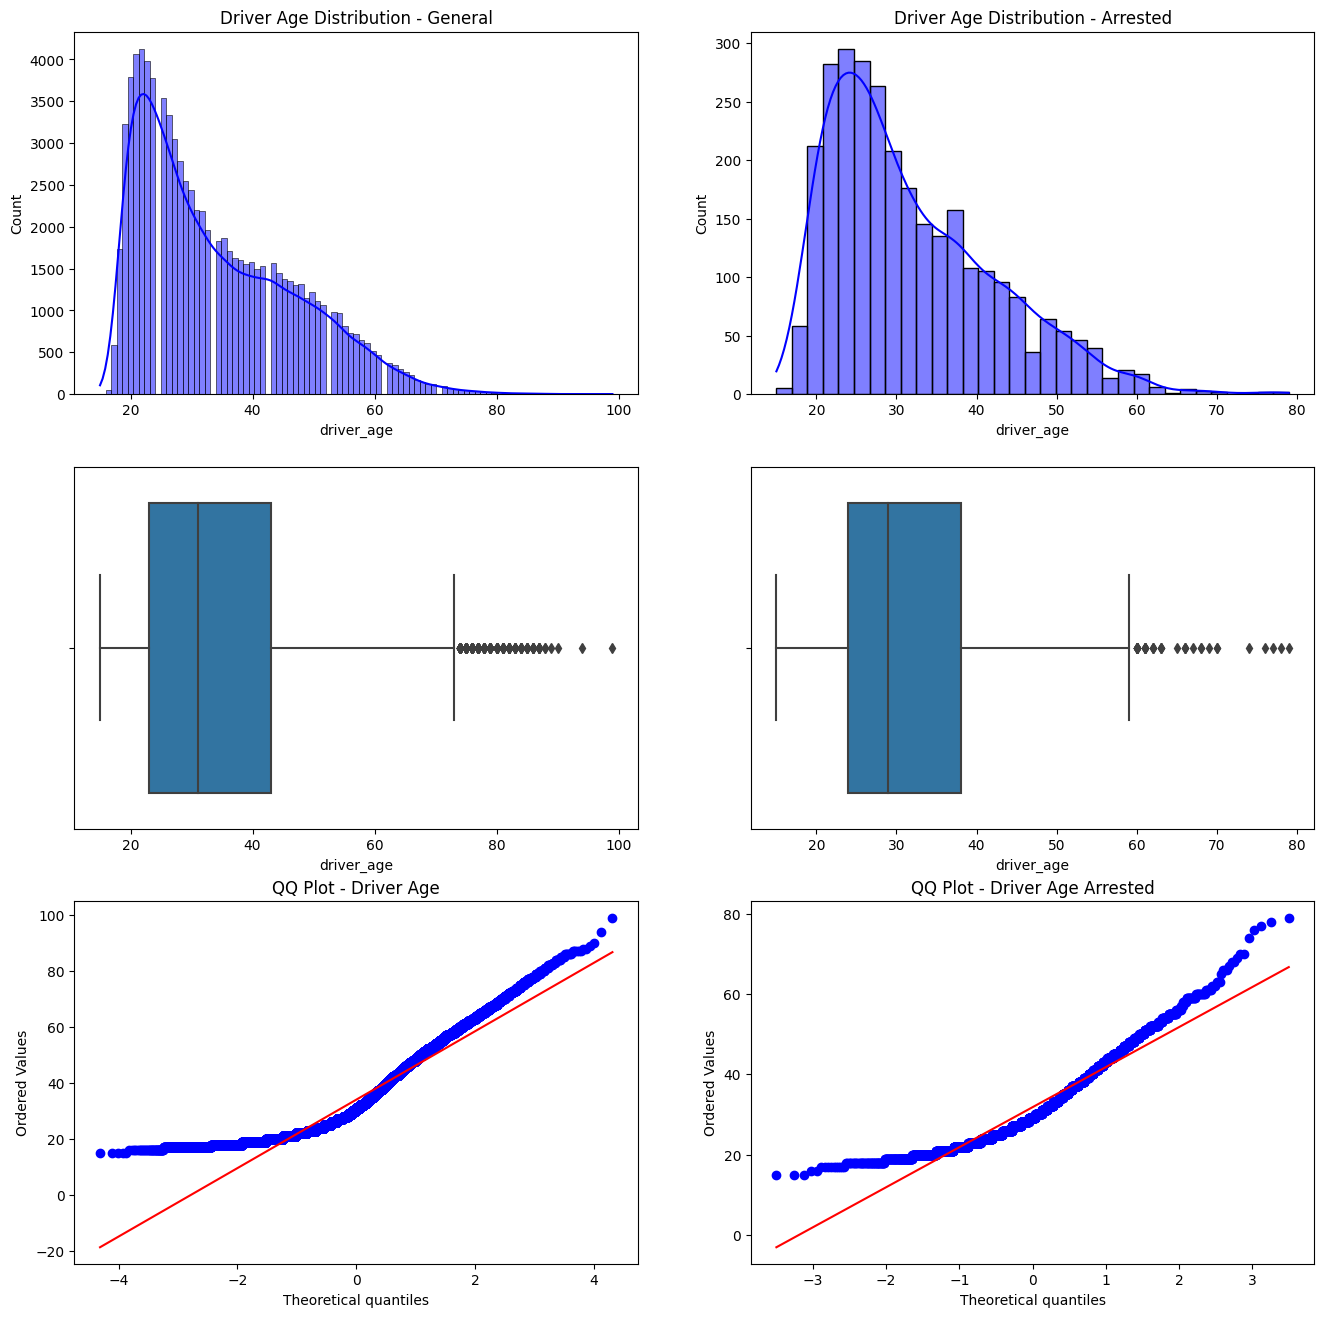

In [6]:
# Tira a idade zero (que indica falta do dado nesse dataset - tratado no processo de etl)
driver_age_df = featured_df.copy()[featured_df.driver_age > 0.0]
driver_age_arrested_df = driver_age_df[driver_age_df["is_arrested"] == True]

plot_distribution(
    general=driver_age_df.driver_age,
    arrested=driver_age_arrested_df.driver_age,
    title="Driver Age",
)

### Distribuição do Nível do Resultado da Parada (stop_outcome_level)

#### Análise 📈 

**📊 Tipo de Distribuição:**
- A distribuição foi aplicado em uma variável categórica ordinal, portanto o resultado não foi o esperado.
- Ainda podemos inferir uma distribuição para cada um dos casos:
  - Para o caso geral, podemos inferir uma distribuição normal, pois a maioria dos dados estão concentrados no centro.
  - Para o caso de paradas resultantes em prisão, podemos inferir uma distribuição enviesada (exponencial), o que é esperado porque a prisão está diretamente relacionada com o nível de resultado da parada.

**📝 Notas:**
- O `boxplot` e o `QQ Plot` não revelaram muitas informações sobre a distribuição dos dados.
- Provavelmente porque a variável é categórica

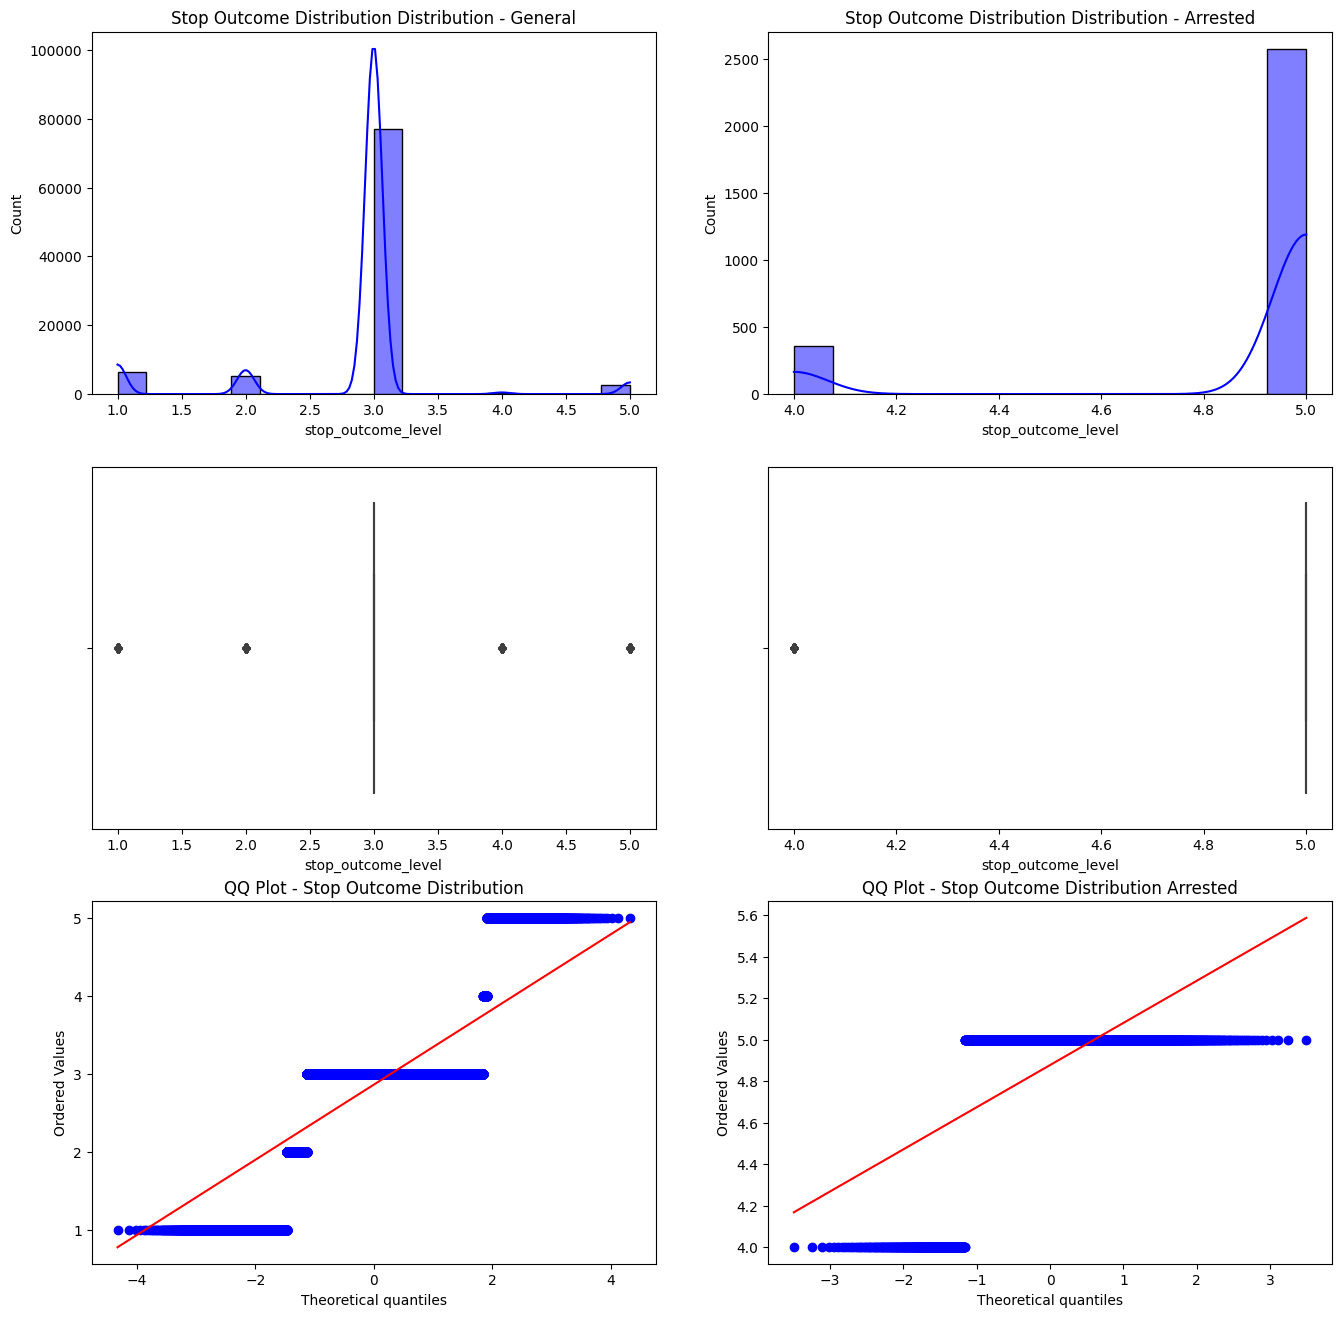

In [7]:
stop_outcome_df = featured_df.copy()
stop_outcome_arrested_df = stop_outcome_df[stop_outcome_df.is_arrested == True]

plot_distribution(
    general=stop_outcome_df.stop_outcome_level,
    arrested=stop_outcome_arrested_df.stop_outcome_level,
    title="Stop Outcome Distribution",
)

### Distribuição de tempo de parada (stop_duration_continuous)

#### Análise 📈 

**📊 Tipo de Distribuição:** Normal

**📝 Notas:**

- Apesar da tentativa de transformar a coluna `stop_duration` em uma variável numérica, não foi possível. Ela continuou sendo uma variável categórica, porém com valores numéricos(ordinal).
- Assim como na análise acima, o `QQ Plot` não foi proveu muita informação(variável categórica).
- O `boxplot` no entanto mostra que paradas que resultam em prisão são mais longas.

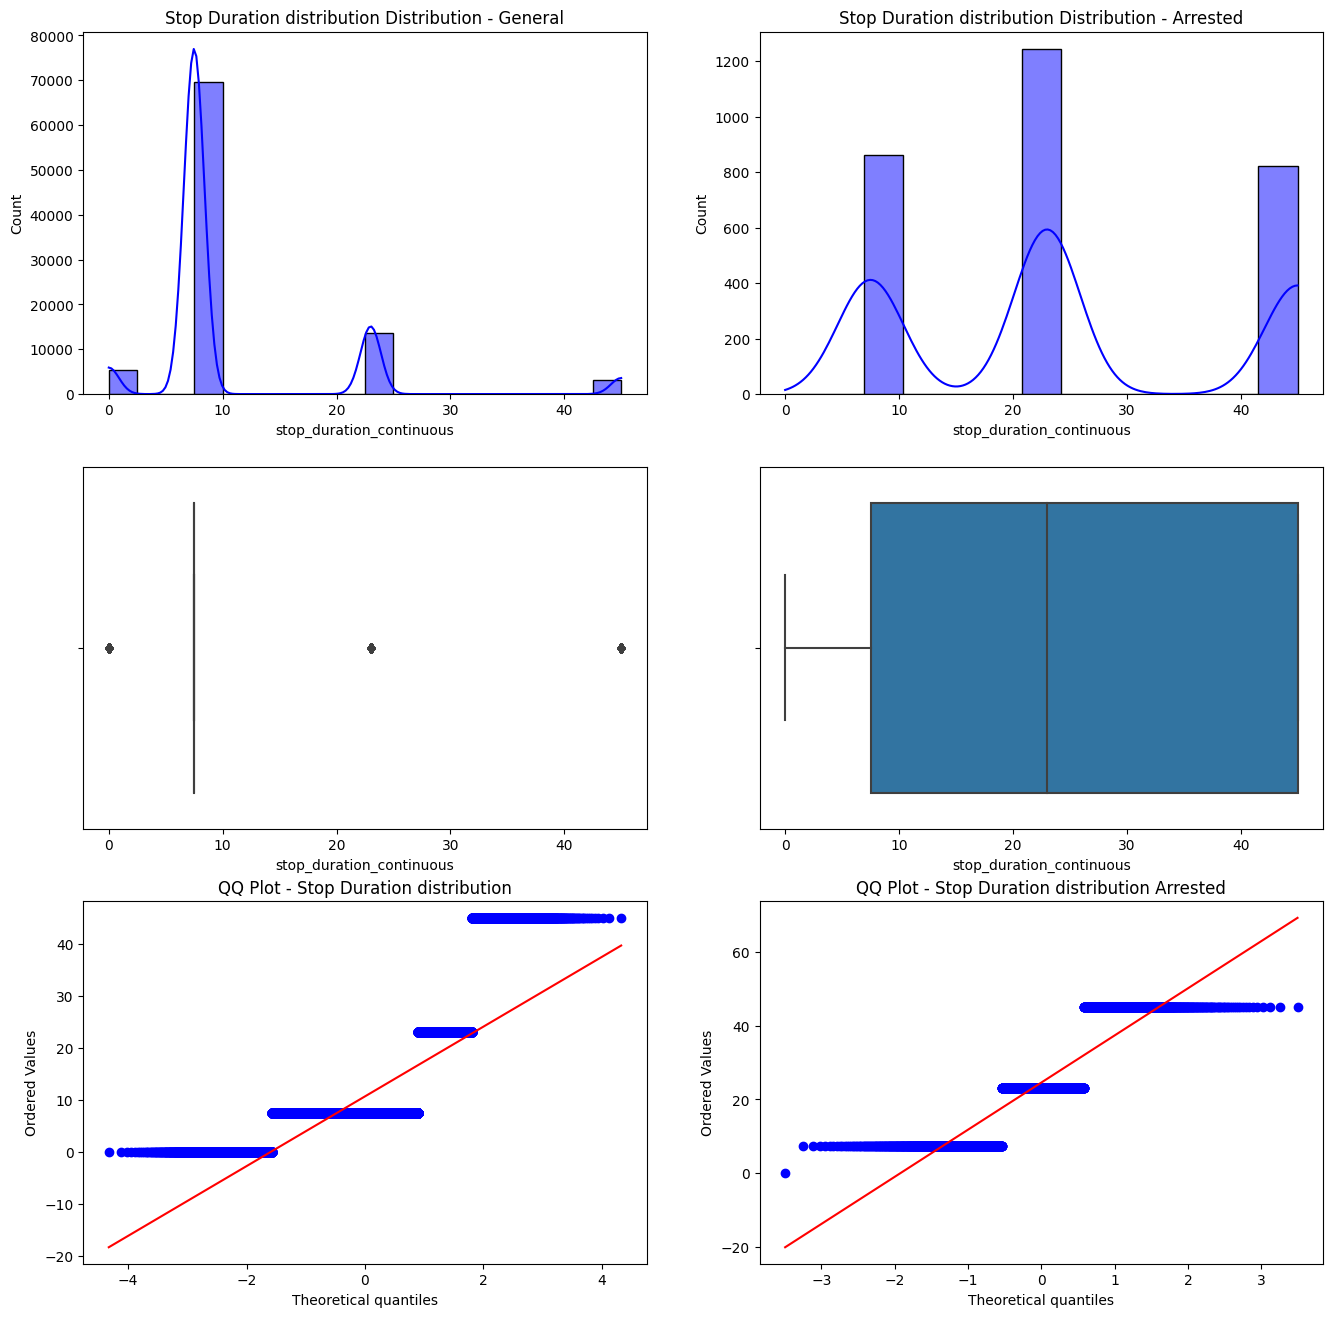

In [8]:
stop_time_df = featured_df.copy()
stop_time_arrested_df = stop_time_df[stop_time_df.is_arrested == True]

plot_distribution(
    general=stop_time_df.stop_duration_continuous,
    arrested=stop_time_arrested_df.stop_duration_continuous,
    title="Stop Duration distribution",
)

### Distribuição do Horário da Para (stop_time_discrete)

#### Análise 📈 

**📊 Tipo de Distribuição:** 
- Para paradas gerais: Distribuição multimodal.
- Para paradas que resultaram em prisão: Distribuição uniforme, porém com um viés nas primeiras horas do dia(madrugada).

**📝 Notas:**
- A marioria das paradas que resultaram em prisão estão entre: 22:00 e 04:00.
- O `boxplot` que se baseia em estimativas de quartis(robustas), mostrou pouca diferença na distribuição dos dados.
- É possível perceber que as distribuições não seguem a distribuição normal ao olhar para o `QQ Plot`. 

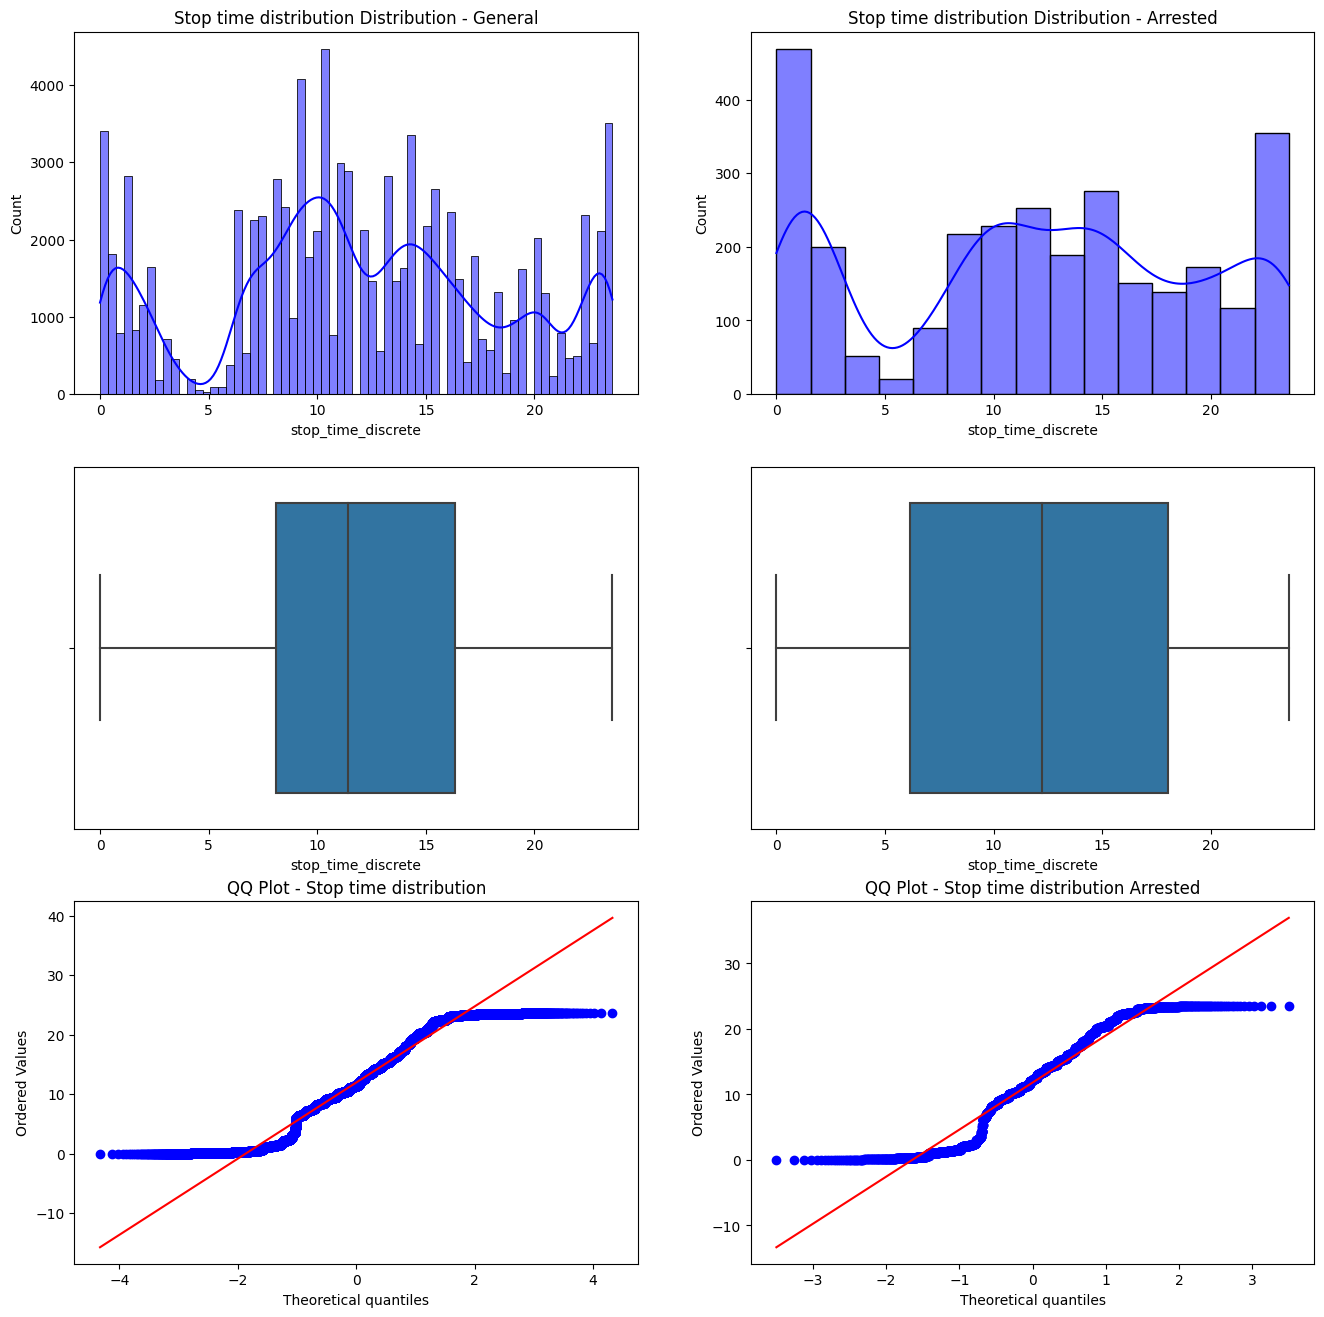

In [10]:
stop_time_df = featured_df.copy()
stop_time_arrested_df = stop_time_df[stop_time_df.is_arrested == True]

plot_distribution(
    general=stop_time_df.stop_time_discrete,
    arrested=stop_time_arrested_df.stop_time_discrete,
    title="Stop time distribution",
)